In [4]:
import kagglehub

In [5]:
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 1.55k/1.55k [00:00<00:00, 1.58MB/s]

Extracting files...
Path to dataset files: C:\Users\admin\.cache\kagglehub\datasets\vjchoudhary7\customer-segmentation-tutorial-in-python\versions\1


## Data Preprocessing Improvements

We need to: <br>
        - Check for missing values<br>
        - Scale numerical features using StandardScaler

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv("Mall_Customers.csv")  
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Selecting numerical features for scaling
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Apply StandardScaler
scaler = StandardScaler() # normalizes data
data_scaled = scaler.fit_transform(data[numerical_features])

# Convert back to DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=numerical_features)

# Display the first few rows after scaling
data_scaled.head()

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [8]:
import pandas as pd

# Convert `data_scaled` to DataFrame if it's a NumPy array
if not isinstance(data_scaled, pd.DataFrame):
    data_scaled = pd.DataFrame(data_scaled, columns=[f'Feature_{i}' for i in range(data_scaled.shape[1])])

# Ensure 'Gender' exists in `data`
if 'Gender' in data.columns:
    combined_data = pd.concat([data_scaled, data['Gender']], axis=1)
else:
    raise ValueError("Column 'Gender' not found in `data`")

    import numpy as np

# Replace infinite values with NaN
data_scaled.replace([np.inf, -np.inf], np.nan, inplace=True)
combined_data['Gender'] = combined_data['Gender'].astype(str)  # Convert to categorical

## Improved Visualizations

- Pairplot to analyze relationships <br>
- Heatmap to visualize correlations

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

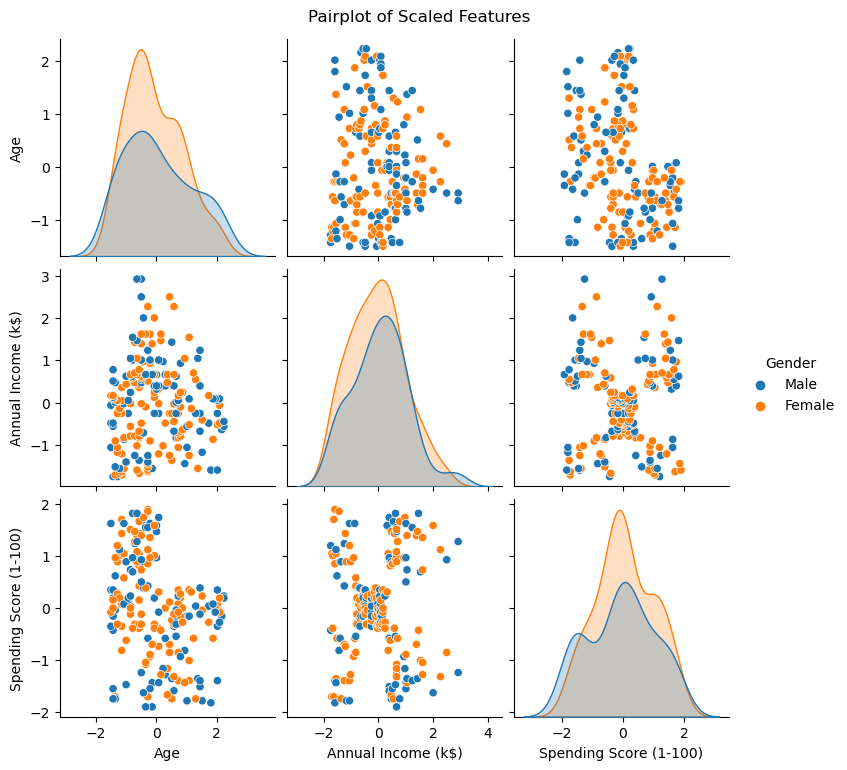

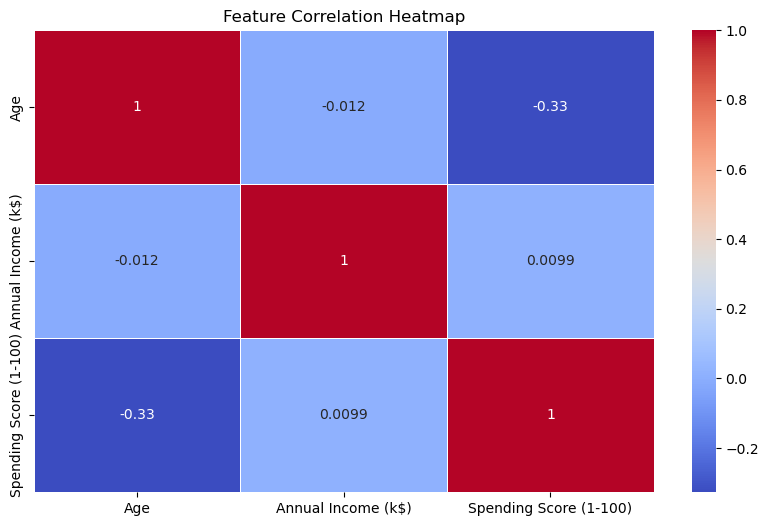

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Convert `data_scaled` to DataFrame if needed
if not isinstance(data_scaled, pd.DataFrame):
    data_scaled = pd.DataFrame(data_scaled, columns=[f'Feature_{i}' for i in range(data_scaled.shape[1])])

# Replace infinite values with NaN
data_scaled.replace([np.inf, -np.inf], np.nan, inplace=True)

# Ensure 'Gender' exists and convert to categorical
if 'Gender' in data.columns:
    combined_data = pd.concat([data_scaled, data['Gender']], axis=1)
    combined_data['Gender'] = combined_data['Gender'].astype(str)  # Convert to categorical
else:
    raise ValueError("Column 'Gender' not found in `data`")

# Pairplot
sns.pairplot(combined_data, hue='Gender')
plt.suptitle("Pairplot of Scaled Features", y=1.02)
plt.show()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data_scaled.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


## Sustainable Clustering Models

- Finding the best number of clusters using Elbow Method and Silhouette Score <br>
- Improve clustering by tuning KMeans

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

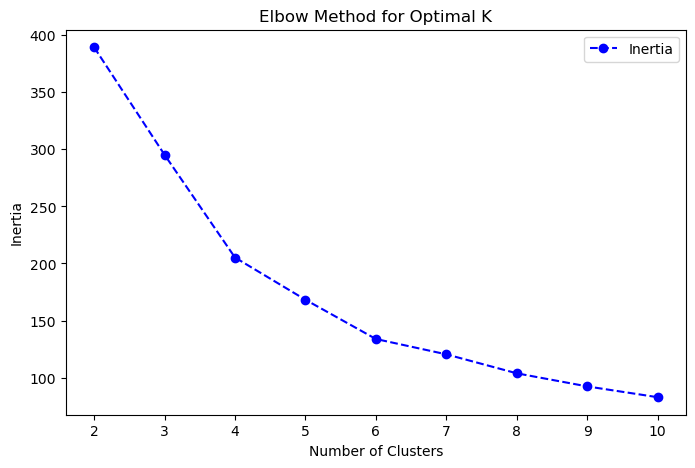

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Finding the optimal number of clusters using Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Testing for 2 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plot Elbow method
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b', label='Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.legend()
plt.show()

The Elbow method helps find the ooptimal K  by measuring the inertia (also called Within-Cluster Sum of Squares, wcss).

- Inertia (WCSS) measures how tightly grouped data points are within a cluster.
- It decreases as K increases, but adding too many clusters overfits the data

The point where the rate of decrease slows down (forms an elbow) is the optimal K.

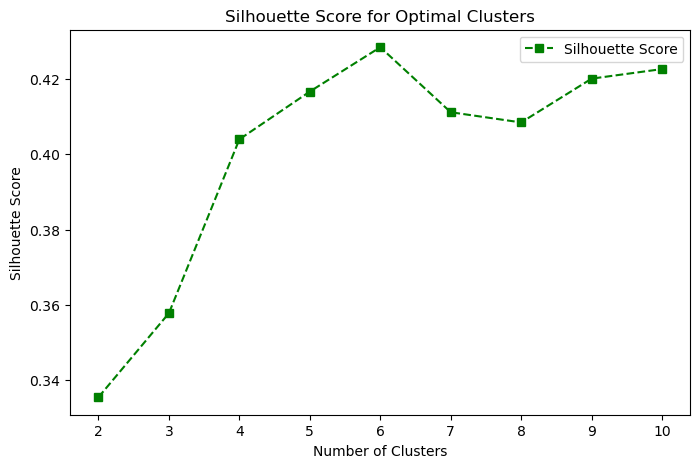

In [12]:
# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='g', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')
plt.legend()
plt.show()

The silhouette Score measures how well-separated clusters are by evaluating:

- Cohesion - how close a point is to its own cluster
- separation - how far a point is from the nearest other cluster

The **Silhouette Score** measures how well-separated clusters are:

- **High Silhouette Score (~1.0)** → Points are **well-clustered** ✅  
- **Low Silhouette Score (~0.0)** → Points **overlap between clusters** ⚠️  
- **Negative Score (< 0)** → Points are in the **wrong cluster** ❌  

## 📌 Understanding Our Scores

- **The Elbow Mehod shows that inertia decreases as K increases**
- **K=6 has the highest Silhouette Score, meaning it provides the best separation between clusters**

In [20]:
from sklearn.metrics import silhouette_score

# Get cluster labels
labels= kmeans.labels_

# compute  silhouette score 
silhouette_avg = silhouette_score(data_scaled, labels)

print(f'Silhouette Score for k=6: {silhouette_avg:.4f}')
print(f'Inertia (WCSS): {kmeans.inertia_:.4f}')

Silhouette Score for k=6: 0.4226
Inertia (WCSS): 82.8853
